<a href="https://colab.research.google.com/github/suimn416/2019.Spring.AI_Leader/blob/master/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%A0%84%EC%B2%98%EB%A6%AC(Augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
    drive.mount('/content/gdrive')
    print('Google Drive is mounted\n')
else:
    print('Google Drive is already mounted\n')

Google Drive is already mounted



keras Data Augmentation

In [0]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [0]:
datagen = ImageDataGenerator(

        horizontal_flip = True,                        #죄우 대칭을 위한 코드
        fill_mode='nearest')

img = load_img('./gdrive/My Drive/AILeader_Dataset/광나루안전체험관/IMAGE0000.jpg')  # 이미지 로드 


In [0]:
x = img_to_array(img) # (3, 150, 150) 크기의 NumPy 배열로 이미지 변환 

In [0]:
x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열


In [0]:
# 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
# 지정된 `preview/` 폴더에 저장합니다.


i = 0
for batch in datagen.flow(x, batch_size=1, shuffle = True ,save_to_dir='./gdrive/My Drive/preview', save_prefix='./시계탑', save_format='jpeg'):
                                                                             
   
    i += 1
    if i > 0:
        break  # 이미지 1장을 생성하고 마칩니다
        

PyTorch Data Augmentation

In [0]:
import PIL
import numpy as np
import torch
import torchvision

In [0]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),                    #이미지의 크기
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05), #사진의 밝기를 변화시키는 코드
    torchvision.transforms.RandomHorizontalFlip(),               #죄우 대칭을 위한 코드
    
])

In [0]:
dataset = torchvision.datasets.ImageFolder(root='./gdrive/My Drive/AILeader_Dataset/',transform=transforms)

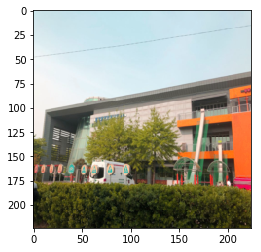

In [0]:
import matplotlib.pyplot as plt #불러온 데이터를 확인하는 코드
%matplotlib inline

a = np.asarray(dataset[72][0])  #현제 파이일중 72번째 사진
a.shape
plt.imshow(a)